In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [33]:
df=pd.read_csv('Camden_accidents/Camden_accidents2.csv')
df.dtypes

Datetime                      object
Number                        object
Municipality                  object
Date                          object
Day of Week                   object
Severity                      object
Intersection                  object
Crash Type                     int64
Total Vehicles               float64
Location                      object
Road Horizontal Alignment    float64
Road Grade                   float64
Road Surface Type            float64
Surface Condition            float64
Light Condition              float64
Environment Condition        float64
Road Divided By              float64
Posted Speed                 float64
Month                          int64
dtype: object

In [34]:
df.loc[df.Severity=='F', 'Severity']='1'
df.loc[df['Severity']=='I', 'Severity']='1'
df.loc[df['Severity']=='P', 'Severity']='0'

In [35]:
df.drop(columns=['Datetime', 'Date', 'Day of Week', 'Location', 'Road Horizontal Alignment', 'Road Grade', 'Road Surface Type',
                'Surface Condition', 'Light Condition', 'Road Divided By', 'Posted Speed', 'Month', 'Environment Condition'], inplace=True)

In [36]:
df2=pd.read_csv('Camden_accidents/Camden_V3.csv')
df2.head()

,Unnamed: 0,Number,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,V_Age_x,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,V_Age_y
0,0,2017040217-036-A,6.0,6.0,2,1.0,1.0,10.0,6.0,6.0,2,1.0,1.0,10.0
1,1,2017040217-067-A,3.0,4.0,4,4.0,1.0,6.0,12.0,12.0,4,1.0,1.0,12.0
2,2,2017040217-161-A,12.0,12.0,2,1.0,1.0,1.0,6.0,3.0,4,8.0,1.0,10.0
3,3,2017040217-194-A,2.0,2.0,3,1.0,1.0,16.0,7.0,17.0,2,31.0,1.0,9.0
4,4,2017040217-280-A,12.0,12.0,4,1.0,2.0,8.0,6.0,6.0,2,5.0,1.0,17.0


In [37]:
df2.drop(columns=['Unnamed: 0', 'Vehicle Use_x', 'V_Age_x', 'Vehicle Use_y', 'V_Age_y'], inplace=True)

In [38]:
df2.dropna(inplace=True)

In [39]:
df3=df.merge(df2, on='Number')

In [40]:
list=['Municipality','Intersection', 'Severity','Crash Type','Total Vehicles', 'Initial Impact Location_x','Principal Damage Location_x', 'Extent of Damage_x', 'Vehicle Type_x',
       'Initial Impact Location_y', 'Principal Damage Location_y','Extent of Damage_y', 'Vehicle Type_y']
for column in list:
    df3[column]=df3[column].astype('category')

In [41]:
df3.dtypes

Number                           object
Municipality                   category
Severity                       category
Intersection                   category
Crash Type                     category
Total Vehicles                 category
Initial Impact Location_x      category
Principal Damage Location_x    category
Extent of Damage_x             category
Vehicle Type_x                 category
Initial Impact Location_y      category
Principal Damage Location_y    category
Extent of Damage_y             category
Vehicle Type_y                 category
dtype: object

In [42]:
df3.drop(columns=['Number'], inplace=True)
X=df3.drop('Severity',axis=1)
y=df3.Severity

In [43]:
import category_encoders as ce

encoder = ce.BinaryEncoder()
X_binary=encoder.fit_transform(X)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=0)

In [45]:
y_train.value_counts()

0    25312
1     8807
Name: Severity, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
print(confusion_matrix(y_test, y_pred))

[[5708  532]
 [1469  821]]


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6240
           1       0.61      0.36      0.45      2290

    accuracy                           0.77      8530
   macro avg       0.70      0.64      0.65      8530
weighted avg       0.74      0.77      0.74      8530



Text(0.5, 1.0, 'Confusion Matrix of Random Forest Model 1')

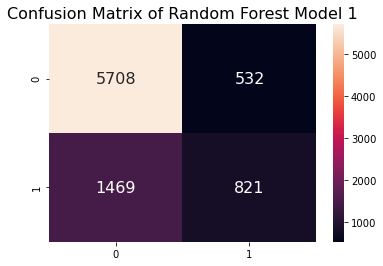

In [49]:
ax=sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Random Forest Model 1",fontdict= { 'fontsize': 16} )

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.742
Accuracy score (validation): 0.732

Learning rate:  0.1
Accuracy score (training): 0.742
Accuracy score (validation): 0.732

Learning rate:  0.25
Accuracy score (training): 0.745
Accuracy score (validation): 0.735

Learning rate:  0.5
Accuracy score (training): 0.760
Accuracy score (validation): 0.752

Learning rate:  0.75
Accuracy score (training): 0.763
Accuracy score (validation): 0.757

Learning rate:  1
Accuracy score (training): 0.764
Accuracy score (validation): 0.756



In [51]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5902,  338],
       [1740,  550]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      6240
           1       0.62      0.24      0.35      2290

    accuracy                           0.76      8530
   macro avg       0.70      0.59      0.60      8530
weighted avg       0.73      0.76      0.71      8530



Text(0.5, 1.0, 'Confusion Matrix of Gradient Boosting Model 1')

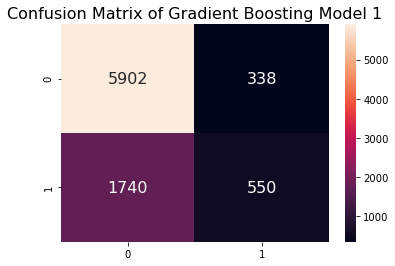

In [53]:
ax=sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Gradient Boosting Model 1",fontdict= { 'fontsize': 16} )

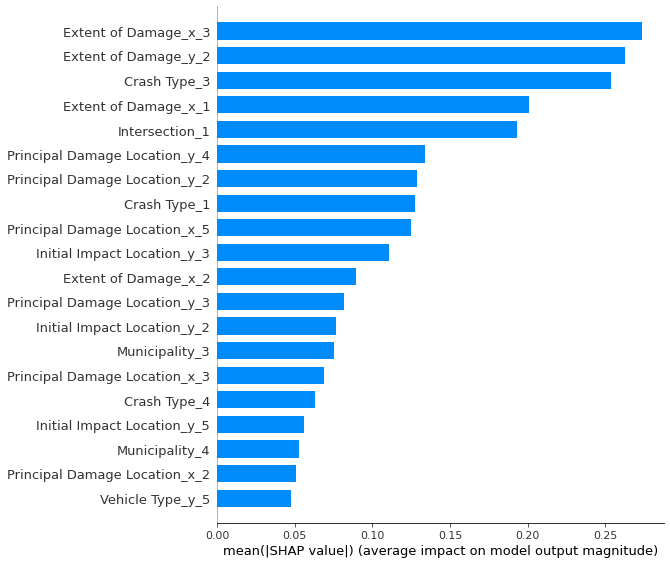

In [54]:
import shap
shap_values = shap.TreeExplainer(gb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [55]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (50624, 60)
After OverSampling, the shape of train_y: (50624,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [56]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_res, y_train_res)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_res, y_train_res)
y_pred=gb.predict(X_test)
confusion_matrix(y_test, y_pred)


Learning rate:  0.05
Accuracy score (training): 0.630
Accuracy score (validation): 0.644

Learning rate:  0.1
Accuracy score (training): 0.633
Accuracy score (validation): 0.645

Learning rate:  0.25
Accuracy score (training): 0.651
Accuracy score (validation): 0.661

Learning rate:  0.5
Accuracy score (training): 0.662
Accuracy score (validation): 0.673

Learning rate:  0.75
Accuracy score (training): 0.663
Accuracy score (validation): 0.670

Learning rate:  1
Accuracy score (training): 0.656
Accuracy score (validation): 0.666



array([[4235, 2005],
       [ 843, 1447]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      6240
           1       0.42      0.63      0.50      2290

    accuracy                           0.67      8530
   macro avg       0.63      0.66      0.63      8530
weighted avg       0.72      0.67      0.68      8530



Text(0.5, 1.0, 'Confusion Matrix of Gradient Boosting Model 2')

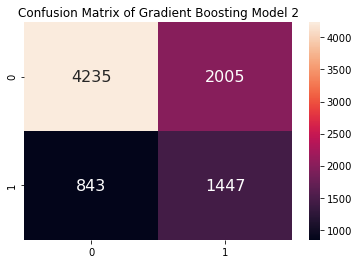

In [58]:
ax=sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Gradient Boosting Model 2",fontdict= { 'fontsize': 12} )

In [59]:
clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_res, y_train_res)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
print(confusion_matrix(y_test, y_pred))

[[4888 1352]
 [1033 1257]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      6240
           1       0.48      0.55      0.51      2290

    accuracy                           0.72      8530
   macro avg       0.65      0.67      0.66      8530
weighted avg       0.73      0.72      0.73      8530



Text(0.5, 1.0, 'Confusion Matrix of Random Forest Model 2')

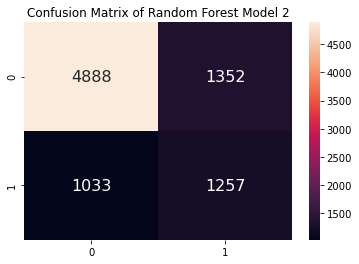

In [61]:
ax=sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Random Forest Model 2",fontdict= { 'fontsize': 12} )

10


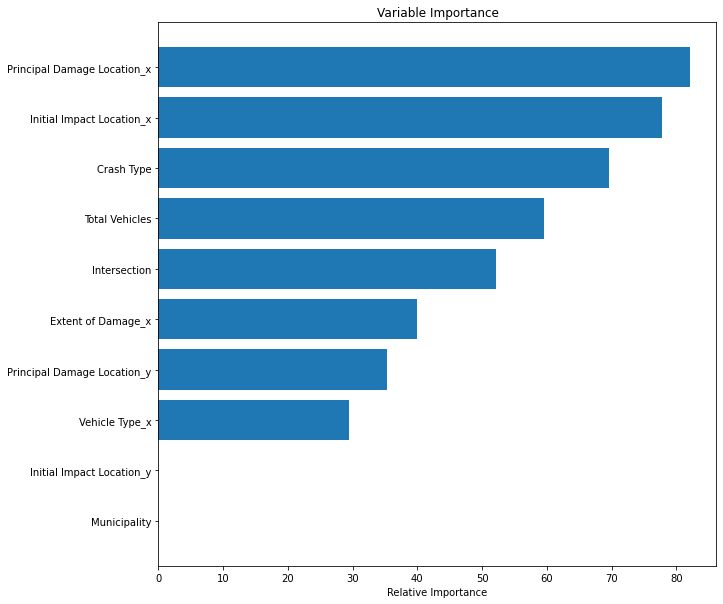

In [63]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:10]
sorted_idx = np.argsort(feature_importance)[:10]
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()